In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
n=100
pro_k=0.5
pro_a=float(1-pro_k)

In [51]:
ki=[]
ad=[]
prob_k=[]
prob_a=[]

In [52]:
func_k=[(4.9,5.0,1),(5.0,5.1,1),(5.1,5.2,1),(5.2,5.3,1),(5.3,5.4,1),(5.4,5.5,1),(5.5,5.9,1)]
func_a=[(4.9,5.4,0.2),(5.4,5.9,1.8)]
area=1.00

In [53]:
class village:
    def __init__(self,n):
        
        self.n=n
        
        for i in range(len(func_k)):
            a,b,l=func_k[i]
            z=int((b-a)*l*100.00/area)
            ki.append(z)
            for j in range(z):
                prob_k.append(i)
            
        for i in range(len(func_a)):
            a,b,l=func_a[i]
            z=int((b-a)*l*100.00/area)
            ad.append(z)
            for j in range(z):
                prob_a.append(i)
      
    def print_village(self):
        state=np.random.randint(100)
        if(state<int(pro_k*100)):
            st="Kid"
            h=np.random.randint(100)
            h=prob_k[h]
            a,b,l=func_k[h]
            height=np.random.uniform(a,b)
        else:
            st="Adult"
            h=np.random.randint(100)
            h=prob_a[h]
            a,b,l=func_a[h]
            height=np.random.uniform(a,b)
        return st,height

In [56]:
H=[]
People=[]
Vil=village(n)
print("---------VILLAGE---------")
for i in range(n):
    st,height=Vil.print_village()
    H.append(height)
    People.append(st)
    print(str(st)+" "*5+str(height))

---------VILLAGE---------
Kid     5.407656914203662
Kid     5.513234470801892
Kid     5.043395864953126
Kid     5.342602974154785
Adult     5.2027316344433086
Adult     5.63475286771607
Kid     5.344679411874938
Adult     5.658662201216113
Kid     5.8605915640087085
Adult     5.7058962985739345
Kid     5.005217685008548
Kid     5.173748105140503
Adult     5.511379930521059
Adult     5.616984293143382
Adult     5.8669083555529165
Kid     5.641472934077476
Adult     5.781330375632614
Adult     5.838846557205443
Kid     5.501986472972157
Adult     5.444813947114917
Kid     4.9678209842384975
Adult     5.788686562251793
Kid     5.14074030002932
Kid     5.718165540843623
Adult     5.5918132843333455
Kid     5.032283513422112
Adult     5.178259471149586
Adult     5.647519173835708
Adult     5.439947199220894
Adult     5.5965987297032855
Kid     5.158239344596681
Adult     5.064079933017674
Kid     5.621079553005456
Adult     5.720994342060953
Adult     5.555192053367593
Adult     5.767273219

(array([10.,  8.,  8.,  3.,  5., 10., 17., 16., 12., 11.]),
 array([4.90860298, 5.00745868, 5.10631438, 5.20517008, 5.30402578,
        5.40288148, 5.50173719, 5.60059289, 5.69944859, 5.79830429,
        5.89715999]),
 <a list of 10 Patch objects>)

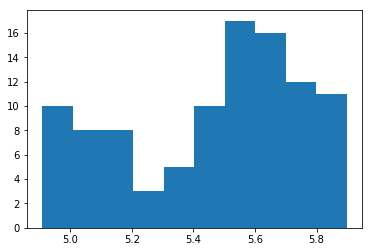

In [72]:
plt.hist(H)

In [58]:
agent_pred=[]
lset=set([])

In [59]:
class agent:
    def __init__(self):
        self.pro_k=pro_k
        self.pro_a=pro_a
        self.lset=lset
        inter=[]
        for i in range(len(func_a)):
            a,b,l=func_a[i]
            self.lset.add(a)
            self.lset.add(b)
            
        for i in range(len(func_k)):
            a,b,l=func_k[i]
            self.lset.add(a)
            self.lset.add(b)
        
    def predict(self):    
        i_a=0
        i_k=0
        a1,b1,l1=func_a[i_a]
        a2,b2,l2=func_k[i_k]
        self.lset=sorted(self.lset)
        no=len(lset)
        
        no=no-1
        
        for m in range(no):
            
            if b1<=self.lset[m]:
                i_a=i_a+1
            if b2<=self.lset[m]:
                i_k=i_k+1
                
            a1,b1,l1=func_a[i_a]
            a2,b2,l2=func_k[i_k]
            
            if(float(l1*pro_a)>float(l2*pro_k)):
                agent_pred.append((self.lset[m],self.lset[m+1],'a'))
            else:
                agent_pred.append((self.lset[m],self.lset[m+1],'k'))
        
        return m
    
    def decide(self,height):
        for i in range(len(agent_pred)):
            a,b,s=agent_pred[i]
            if a<=height<=b:
                if s=='a':
                    return "Adult"
                else:
                    return "Kid"
                    

In [60]:
A=agent()
m=A.predict()
print(agent_pred)

[(4.9, 5.0, 'k'), (5.0, 5.1, 'k'), (5.1, 5.2, 'k'), (5.2, 5.3, 'k'), (5.3, 5.4, 'k'), (5.4, 5.5, 'a'), (5.5, 5.9, 'a')]


In [68]:
s=A.decide(5.3999999)
print(s)

Kid


In [66]:
loss=0.00
for i in range(len(H)):
    if(People[i]!=A.decide(H[i])):
        loss+=float(1/len(H))
print("Average Loss : "+str(loss))

Average Loss : 0.26000000000000006
